# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from seaborn import distplot
%matplotlib inline
import re

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [59]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [60]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [61]:
temp.info()
#tenemos la columna de temperatura de tipo float, y la de ciudad y estado, que son de tipo objeto.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [62]:
temp.head(3)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [63]:
pt = temp.head(3)
pt["Temperature"].mean()



10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [64]:
temp[(temp["Temperature"] > 15)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [65]:
ciudades = temp[["City","Temperature"]]
ciudades[(ciudades["Temperature"] > 15)]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [66]:
ciudades[(ciudades["Temperature"] > 15) & (ciudades["Temperature"]<20)]


,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [67]:
states = temp[["State","Temperature"]]
nueva_york_media = states.head(3).mean()
nueva_york_std = states.head(3).std()
print(nueva_york_media) #temperatura media de Nueva York
print(nueva_york_std) #desviacion de la temperatura de Nueva York
print("--------------------------")
connecticut = states.loc[3:4]
print(connecticut.mean()) #media conetica
print(connecticut.std()) #desviacion conetica
print("--------------------------")
new_yersey = states.loc[5:6]
print(new_yersey.mean()) #temperatura media new yersey
print(new_yersey.std()) #desviacion new yersey

Temperature    10.740741
dtype: float64
Temperature    8.133404
dtype: float64
--------------------------
Temperature    15.833333
dtype: float64
Temperature    1.964186
dtype: float64
--------------------------
Temperature    21.111111
dtype: float64
Temperature    1.571348
dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [68]:
employee = pd.read_csv("employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [69]:
employee.info()
#las columnas de nombre,departamento,educación,género y título son de tipo objeto.
#las columnas de salario y de años son de tipo int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

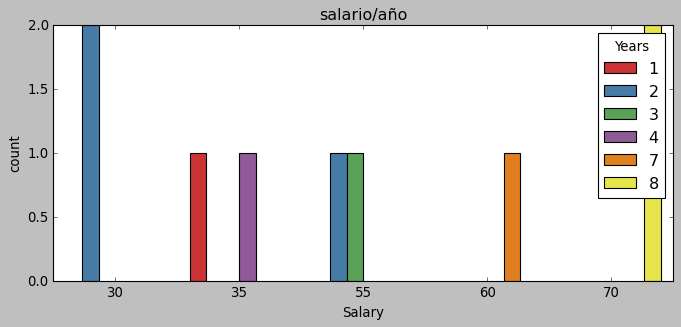

In [98]:
plt.figure(figsize = (10,4))
plt.style.use('classic')
plt.title("salario/año")
sns.countplot(x='Salary', hue='Years', data=employee, palette= "Set1")
plt.show()

#Nos da a entender esta gráfica que en general se cobra más según el tiempo que lleves en la empresa.

#### What's the average salary in this company?

In [99]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [100]:
employee.Salary.max()

70

#### What's the lowest salary?

In [102]:
employee.Salary.min()


30

#### Who are the employees with the lowest salary?

In [112]:
emple = employee[["Name","Salary"]]
salario_bajo = emple.sort_values('Salary')
salario_bajo.head(2)

,Name,Salary
1,Maria,30
2,David,30


#### Could you give all the information about an employee called David?

In [117]:
david = employee.loc[2]
david

Name            David
Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: 2, dtype: object

#### Could you give only David's salary?

In [118]:
salario_david = david["Salary"]
salario_david

30

#### Print all the rows where job title is associate

In [121]:
associate = employee[(employee["Title"] == "associate")]
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [125]:
print(employee.head(3))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [124]:
print(employee.loc[0:2])


    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [127]:
aso_55 = employee[(employee["Title"] == "associate")&(employee["Salary"]>55)]
aso_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [168]:
grouped = employee.groupby(['Name', 'Years']).mean()
grouped.sort_values("Years")

,,Salary
Name,Years,
Jose,1,35
David,2,30
Eva,2,55
Maria,2,30
Samuel,3,55
Sonia,4,35
Pedro,7,60
Ana,8,70
Carlos,8,70


####  What is the average Salary per title?

In [172]:
group = employee.groupby(['Title',"Salary"]).mean()
group.sort_values("Salary",ascending = False)


Years
Title     Salary       
VP        70        8.0
associate 60        7.0
          55        2.5
analyst   35        2.5
          30        2.0

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

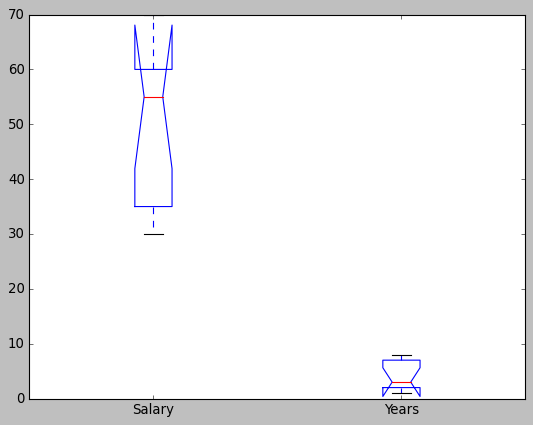

In [183]:
x = employee["Salary"]
y = employee["Years"]
plt.boxplot((x, y), notch=True, sym="o", labels=["Salary", "Years"])
plt.show()

In [27]:
# print first quartile here

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Is the mean salary per gender different?

In [311]:
gender = employee.groupby(['Gender',"Salary"]).mean()
print(gender.head(4).mean())
print(gender.tail().mean())
#no supone un cambio significativo.

Years    4.0
dtype: float64
Years    4.2
dtype: float64


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [323]:
dep = employee[["Department","Years","Salary"]]
agrup = dep.groupby("Department")
print(agrup.max())
print(agrup.mean())
print(agrup.min())

            Years  Salary
Department               
HR              8      70
IT              8      70
Sales           3      55
               Years  Salary
Department                  
HR          4.666667   45.00
IT          4.500000   48.75
Sales       2.500000   55.00
            Years  Salary
Department               
HR              2      30
IT              1      30
Sales           2      55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [335]:
d = employee[["Department","Salary"]]
agrupo = d.groupby("Department")

maximo = agrupo.max()
minimo = agrupo.min()
resultado = maximo["Salary"] - minimo["Salary"]
resultado

#aqui me encantaria saber una manera con lambda pero tire por esta...

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [184]:
orden = pd.read_csv("Orders.csv")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [185]:
orden.info() #tenemos columnas de tipo objeto, de tipo int y de tipo float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [186]:
orden.describe() #nos da información de las columnas, es decir, el recuento,la media etc..


,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

3.116174

#### What were the highest and lowest purchase prices? 

el precio máximo fue  8142.75

y el mínimo fue de 0, asique parece que hay pedidos gratis.

#### Select all the customers we have in Spain

In [251]:
customers_spain = orden[(orden["Country"]=="Spain")]
customers_spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [252]:
clientes_españa = orden["Country"].value_counts()
#Tiene 2485.

#### Select all the customers who have bought more than 50 items ?

In [253]:
articulos_50 = orden[(orden["Quantity"]>50)]
articulos_50.head()


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [254]:
pedidos_españa = orden[(orden["Country"]=="Spain")&(orden["Quantity"]>50)]
pedidos_españa.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [255]:
gratis = orden[(orden["UnitPrice"]==0)]
gratis.head()


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
#aqui no entendi bien lo de lunch bag no me cogía la palabra.

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [380]:
orden[(orden["Description"]=="lunch bag")]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent


#### Show the frequency distribution of the amount spent in Spain.

In [260]:
importe_españa = orden[orden["Country"]=="Spain"]
(importe_españa.groupby("amount_spent").agg(frequency=("amount_spent", "count")))


,frequency
amount_spent,
0.00,1
0.21,3
0.29,1
0.39,3
0.42,1
...,...
417.50,1
488.16,2
1080.00,1


#### Select all orders made in the month of August

In [344]:
agosto = orden[(orden["month"]==8)]
agosto.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [376]:
ag = orden[(orden["month"]==8)]
t = ag[["Country","Quantity"]]
t.groupby("Country").count()


,Quantity
Country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country

In [274]:
paises = orden[["Country","amount_spent"]]
paises.groupby("Country").mean()


,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [265]:
articulo_caro = orden.sort_values("UnitPrice",ascending = False)
articulo_caro.loc[118352]

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object

#### What was the average amount spent per year ?

In [282]:
orden["amount_spent"].mean()

22.39474850474768